# Importing Libraries and Loading datasets

In [1]:
import os
import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
tf.config.threading.set_intra_op_parallelism_threads(6)
tf.config.threading.set_inter_op_parallelism_threads(2)

from tensorflow import keras
from tensorflow.keras import layers, callbacks

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [2]:
train = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv', index_col=0)
test = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv', index_col=0)
sub = pd.read_csv('../input/tabular-playground-series-may-2022/sample_submission.csv')

# Explore Data

In [3]:
train.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [4]:
train.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,2.362431,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,1.637706,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,14.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [5]:
print("Columns: \n{0}".format(list(train.columns)))

Columns: 
['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'target']


# Basic Data Check

In [6]:
print('Train data shape:', train.shape)
print('Test data shape:', test.shape)

Train data shape: (900000, 32)
Test data shape: (700000, 31)


## Missing values

In [7]:
missing_values_train = train.isna().any().sum()
print('Missing values in train data: {0}'.format(missing_values_train[missing_values_train > 0]))

missing_values_test = test.isna().any().sum()
print('Missing values in test data: {0}'.format(missing_values_test[missing_values_test > 0]))

Missing values in train data: []
Missing values in test data: []


## Duplicates

In [8]:
duplicates_train = train.duplicated().sum()
print('Duplicates in train data: {0}'.format(duplicates_train))

duplicates_test = test.duplicated().sum()
print('Duplicates in test data: {0}'.format(duplicates_test))

Duplicates in train data: 0
Duplicates in test data: 0


# Target Distribution

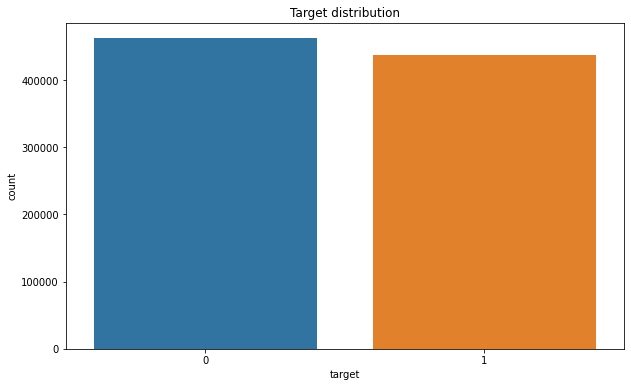

In [9]:
plt.figure(figsize=(10, 6))
plt.title('Target distribution')
ax = sns.countplot(x=train['target'], data=train)

# Feature Engineering

In [10]:
# Credits to https://www.kaggle.com/code/ambrosm/tpsmay22-keras-quickstart/notebook
for df in [train, test]:
    for i in range(10):
        df[f'ch{i}'] = df.f_27.str.get(i).apply(ord) - ord('A')
    # Next feature is from https://www.kaggle.com/code/cabaxiom/tps-may-22-eda-lgbm-model
    df["unique_characters"] = df.f_27.apply(lambda s: len(set(s)))
    df.drop('f_27', axis=1, inplace=True)
print("Columns: \n{0}".format(list(train.columns)))
train.head()

Columns: 
['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_28', 'f_29', 'f_30', 'target', 'ch0', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'unique_characters']


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,unique_characters
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,1,0,1,3,0,3,1,0,1,3
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2,0,2,2,0,3,2,4,1,5
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,0,0,4,0,1,2,10,0,3,6
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,3,1,1,0,0,2,1,2,1,4
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,3,1,2,1,1,2,7,5,4,6


# Modelling

In [11]:
X = train.drop('target', axis=1).copy()
y = train.target.copy()
test_X = test.copy()

# Scaling and Nomalization
transformer = make_pipeline(
    StandardScaler()
)
columns = X.columns[:-11]

transformer_new = make_pipeline(
    StandardScaler()
)
new_columns = X.columns[-11:]

preprocessor = make_column_transformer(
    (transformer, columns),
    (transformer_new, new_columns),
)

## Model

In [12]:
N_SPLITS = 5
EPOCHS = 200
BATCH_SIZE = 4096
ACTIVATION = 'swish'

my_seed = 1
def seedAll(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
seedAll(my_seed)

def load_model():
    early_stopping = callbacks.EarlyStopping(
        monitor="val_loss",     # Quantity to be monitored
        patience=20,                # How many epochs to wait before stopping
        restore_best_weights=True)
    
    reduce_lr = callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5,                # Factor by which the learning rate will be reduced
        patience=5)                # Number of epochs with no improvement
    
    model = keras.Sequential([
        layers.Dense(108, activation=ACTIVATION, input_shape=[X.shape[1]]),      
        layers.Dense(64, activation=ACTIVATION), 
        layers.Dense(32, activation=ACTIVATION),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['AUC'])
    
    return model, [early_stopping, reduce_lr]

## Training

In [13]:
scores = []
f_scores = []
test_predictions = []
cv = StratifiedKFold(n_splits=N_SPLITS, random_state=my_seed, shuffle=True)
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    train_X, val_X = X.iloc[train_idx], X.iloc[test_idx]
    train_y, val_y = y.iloc[train_idx], y.iloc[test_idx]
    
    train_X = preprocessor.fit_transform(train_X)
    val_X = preprocessor.transform(val_X)

    model, CALLBACKS = load_model()
    history = model.fit(
        train_X, train_y,
        validation_data=(val_X, val_y),
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=CALLBACKS,        # Put your callbacks in a list
        verbose=0)                  # Turn off training log

    predictions = model.predict(val_X)
    score = roc_auc_score(val_y, predictions)
    scores.append(score)
    print(f"Fold {fold + 1} \t\t AUC: {score}")

    test_predictions.append(model.predict(preprocessor.transform(test_X)))

    # Saving history to plot at the end
    hist = pd.DataFrame(history.history)
    hist['folds'] = fold + 1
    f_scores = hist if fold == 0 else pd.concat([f_scores, hist], axis=0)
print('Overall AUC: ', np.mean(scores))

2022-05-04 23:18:46.021848: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Fold 1 		 AUC: 0.9960266791322012
Fold 2 		 AUC: 0.9959553124313375
Fold 3 		 AUC: 0.9959446411206226
Fold 4 		 AUC: 0.9961131578753439
Fold 5 		 AUC: 0.9956854747166926
Overall AUC:  0.9959450530552395


## Outcomes

Validation Loss: 0.0806
Validation Loss: 0.0813
Validation Loss: 0.0818
Validation Loss: 0.0800
Validation Loss: 0.0838


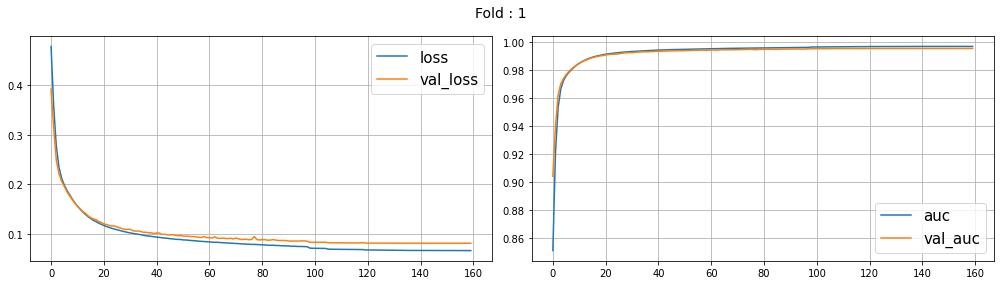

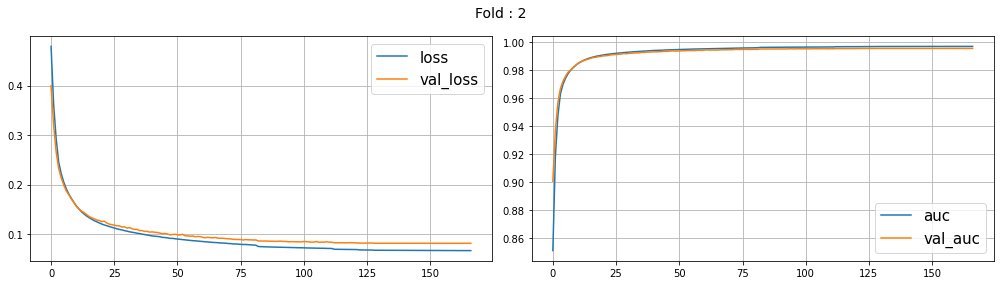

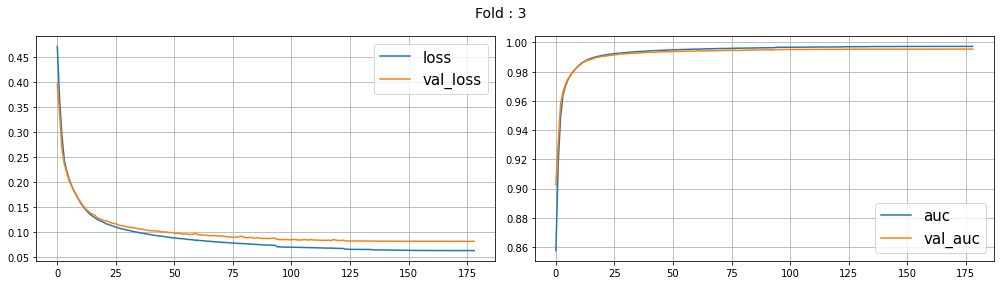

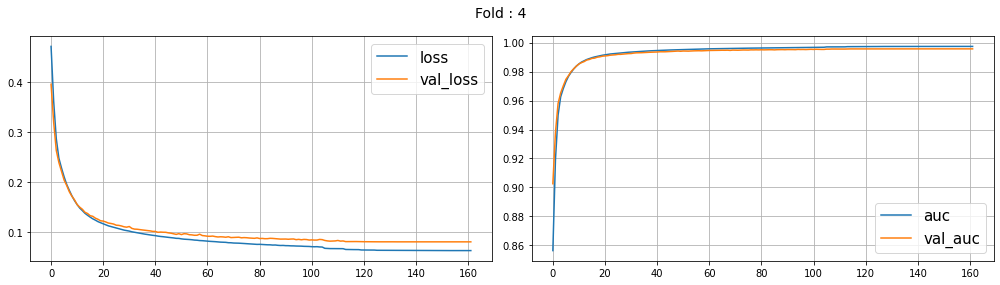

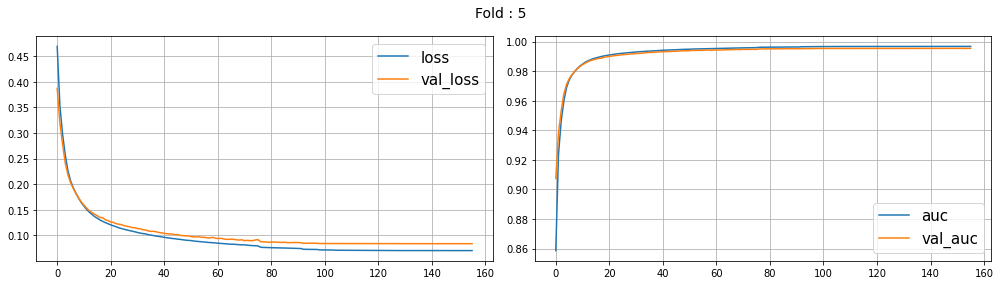

In [14]:
for fold in range(f_scores['folds'].nunique()):
    fold = fold + 1
    history_f = f_scores[f_scores['folds'] == fold]

    fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(14,4))
    fig.suptitle('Fold : ' + str(fold), fontsize=14)
        
    plt.subplot(1,2,1)
    plt.plot(history_f.loc[:, ['loss', 'val_loss']], label= ['loss', 'val_loss'])
    plt.legend(fontsize=15)
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.plot(history_f.loc[:, ['auc', 'val_auc']],label= ['auc', 'val_auc'])
    plt.legend(fontsize=15)
    plt.grid()
    
    print("Validation Loss: {:0.4f}".format(history_f['val_loss'].min()));

# Submission

In [15]:
sub['target'] = np.mean(test_predictions, axis=0)
sub.to_csv('submission.csv', index=False)
sub

,id,target
0,900000,9.999998e-01
1,900001,9.999906e-01
2,900002,3.721667e-09
3,900003,3.024195e-05
4,900004,9.987563e-01
...,...,...
699995,1599995,8.613928e-01
699996,1599996,9.999661e-01
699997,1599997,1.038525e-01
699998,1599998,9.023065e-05
